In [166]:
import pandas as pd

In [167]:
df=pd.read_csv('/content/shampoo.csv',header=0,parse_dates=[0])

<ipython-input-167-f3701fcaa32e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv('/content/shampoo.csv',header=0,parse_dates=[0])


In [168]:
df.tail()

,Month,Sales
31,3-08,407.6
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


<Axes: >

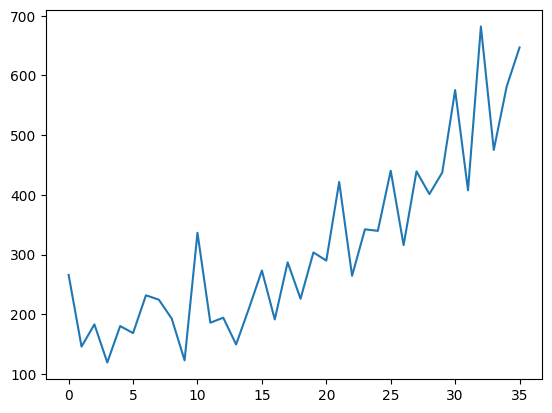

In [169]:
df['Sales'].plot()

Trends is polynomial.
d=2

In [170]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

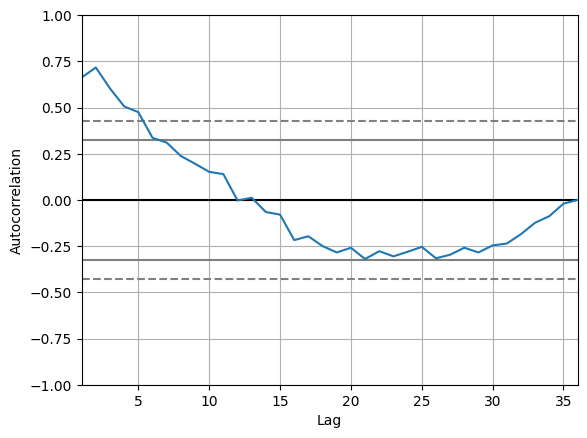

In [171]:
 autocorrelation_plot(df['Sales'])

#### `Values just before line crosses the confidence interval is 5.
` so q=5`

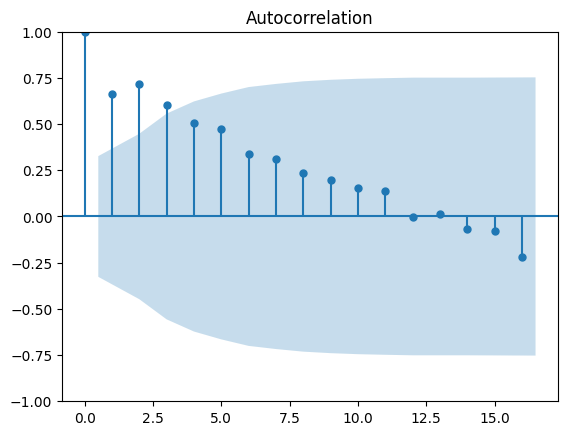

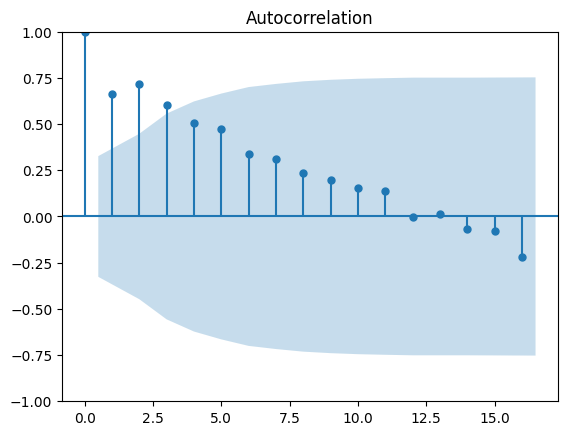

In [172]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
plot_acf(df['Sales'])


In [173]:
from statsmodels.graphics.tsaplots import plot_pacf

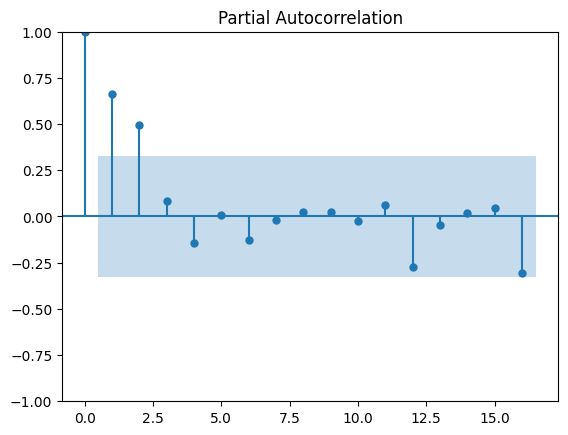

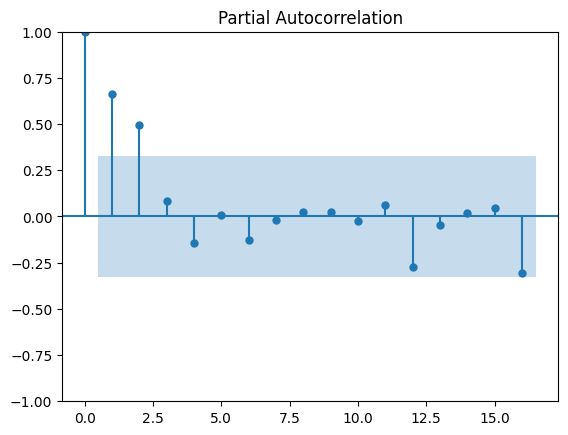

In [174]:
import matplotlib.pyplot as plt
plot_pacf(df['Sales'])

### `value of P for arima model is 2`

In [175]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [176]:
model=ARIMA(df['Sales'],order=(2,2,1))

In [177]:
model_fit=model.fit()

In [178]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -194.852
Date:                Mon, 29 Jul 2024   AIC                            397.703
Time:                        16:44:42   BIC                            403.808
Sample:                             0   HQIC                           399.785
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0308      0.178     -5.793      0.000      -1.380      -0.682
ar.L2         -0.3719      0.173     -2.152      0.031      -0.711      -0.033
ma.L1         -0.9050      0.141     -6.423      0.000      -1.181      -0.629
sigma2      4910.6154   1575.687      3.116      0.002    1822.326    7998.905
===================================================================================
Ljung-Box (L1) (Q):                   0.75   Jarque-Bera (JB):                 0.97
Prob(Q):                              0.39   Prob(JB):                         0.62
Heteroskedasticity (H):               0.92   Skew:                             0.00
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [179]:
residual=model_fit.resid
residual

0     266.000000
1    -251.315130
2     142.868475
3      27.304418
4      88.574761
5      71.447442
6      97.149044
7      54.434558
8     -25.387009
9    -110.689443
10    141.208909
11     35.333831
12    -80.255235
13    -95.140711
14     25.704955
15    114.268059
16     -1.452520
17     27.596865
18     -2.875769
19     40.604192
20     29.827706
21    129.674133
22    -56.050873
23    -59.266069
24      0.862643
25    108.559148
26    -50.567473
27      8.486813
28     18.060217
29     16.245165
30    133.048777
31    -52.975457
32    116.886630
33    -33.234579
34    -48.804935
35     58.863780
dtype: float64

<Axes: ylabel='Density'>

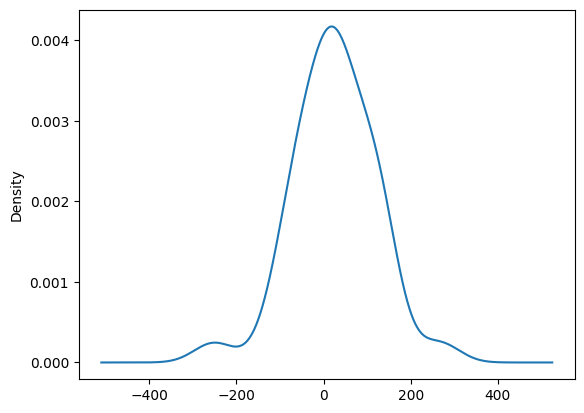

In [180]:
residual.plot(kind='kde')

In [181]:
residual.describe()

count     36.000000
mean      24.583203
std       93.330495
min     -251.315130
25%      -37.127168
50%       26.504686
75%       90.718331
max      266.000000
dtype: float64

In [182]:
output=model_fit.forecast(5)

In [183]:
output

36    584.594365
37    669.161428
38    649.896426
39    683.042426
40    700.776767
Name: predicted_mean, dtype: float64

In [39]:
df.tail()

,Month,Sales
31,3-08,407.6
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


In [78]:
y=model_fit.forecast()
y

36    606.583573
dtype: float64

In [81]:
y

36    606.583573
dtype: float64

In [136]:
import pandas as pd
import datetime

In [137]:
def parser(x):
  return datetime.datetime.strptime('190'+x,'%Y-%m')

In [138]:
df=pd.read_csv('/content/shampoo.csv',header=0,parse_dates=['Month'],date_parser=parser)

<ipython-input-138-75f4c6e40fab>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df=pd.read_csv('/content/shampoo.csv',header=0,parse_dates=['Month'],date_parser=parser)


In [139]:
df.head()

,Month,Sales
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3


In [140]:
train_size=int(df.shape[0]*0.7)

In [141]:
train_data=df.Sales[:train_size]

In [142]:
test_data=df.Sales[train_size:]

In [143]:
train_data.tail(1)

24    339.7
Name: Sales, dtype: float64

In [144]:
test_data.head(1)

25    440.4
Name: Sales, dtype: float64

In [145]:
import numpy as np

In [161]:
data=train_data
predict=[]
for i in test_data:
  model=ARIMA(data,order=(2,2,1))
  model_fit=model.fit()
  y=model_fit.forecast()
  predict.append(y)
  data=np.append(data,i)
  data=pd.Series(data)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/st

In [162]:
test_data

25    440.4
26    315.9
27    439.3
28    401.3
29    437.4
30    575.5
31    407.6
32    682.0
33    475.3
34    581.3
35    646.9
Name: Sales, dtype: float64

In [163]:
predict

[25    339.721828
 dtype: float64,
 26    381.752476
 dtype: float64,
 27    411.766442
 dtype: float64,
 28    370.265984
 dtype: float64,
 29    428.102868
 dtype: float64,
 30    428.784549
 dtype: float64,
 31    491.342521
 dtype: float64,
 32    547.417243
 dtype: float64,
 33    502.469517
 dtype: float64,
 34    652.099066
 dtype: float64,
 35    571.196684
 dtype: float64]

In [164]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test_data.values,predict)

In [165]:
mse

6764.792819910051

## `Sarima model`

In [1]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('/content/us-airlines-monthly-aircraft-miles-flown.csv',header=0,parse_dates=[0])

In [6]:
df

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462
...,...,...
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595


In [7]:
df.index=df['Month']

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result_a=seasonal_decompose(df['MilesMM'],model='multiplicative')

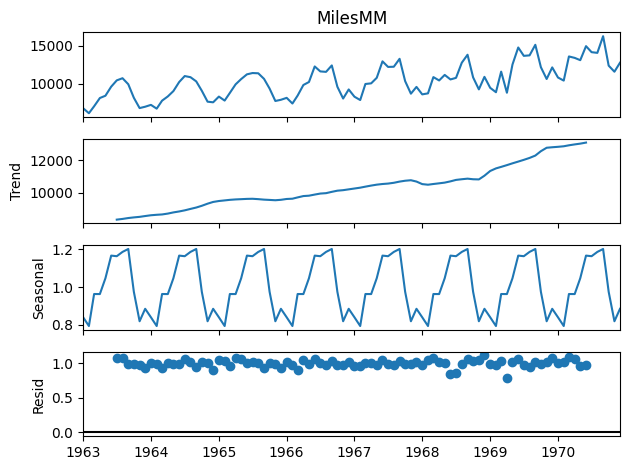

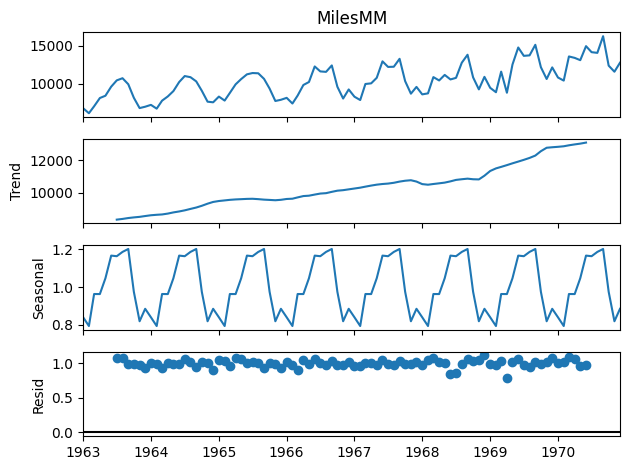

In [10]:
result_a.plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

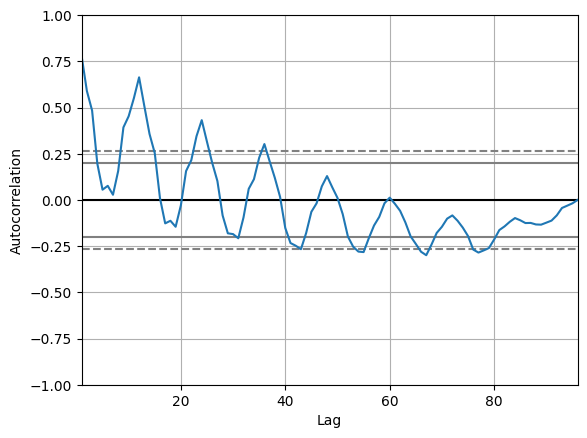

In [12]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['MilesMM'])

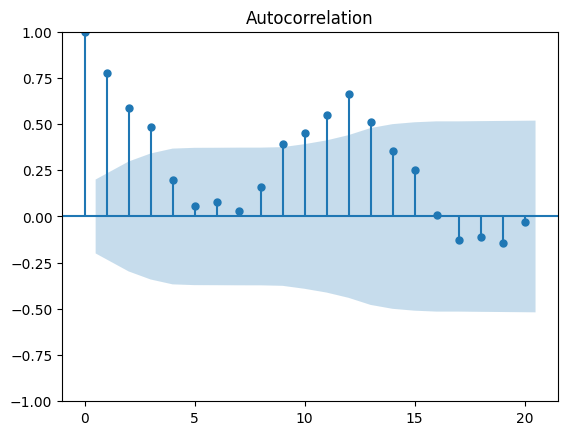

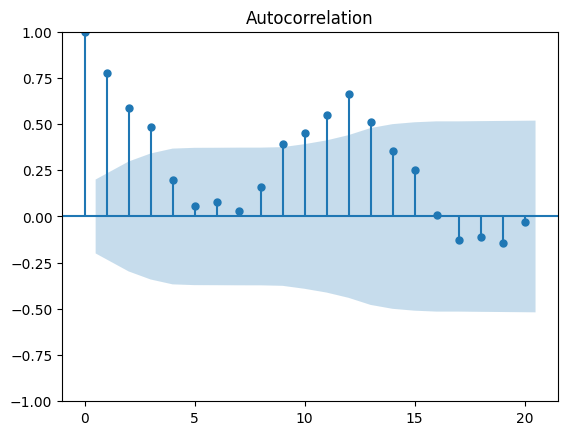

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
plot_acf(df['MilesMM'])

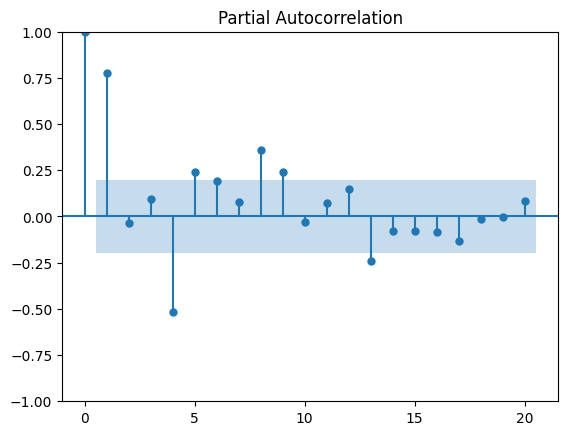

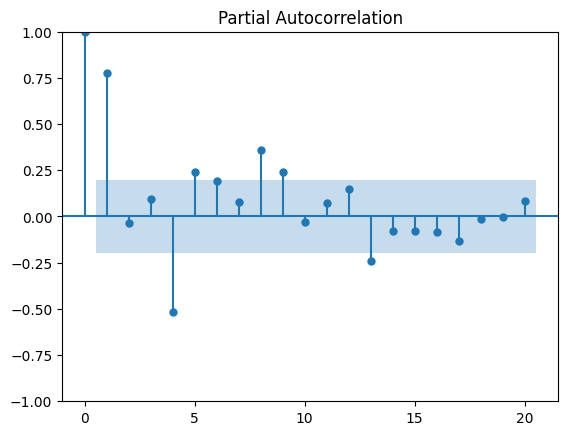

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
plot_pacf(df['MilesMM'])

In [118]:
model=SARIMAX(df['MilesMM'],order=(8,1,3),seasonal_order=(1,1,1,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [119]:
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [120]:
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                              MilesMM   No. Observations:                   96
Model:             SARIMAX(8, 1, 3)x(1, 1, [1], 12)   Log Likelihood                -665.512
Date:                              Mon, 29 Jul 2024   AIC                           1359.024
Time:                                      21:23:27   BIC                           1392.887
Sample:                                  01-01-1963   HQIC                          1372.628
                                       - 12-01-1970                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6087      1.851     -0.329      0.742      -4.236       3.019
ar.L2         -0.22

In [121]:
residual=model_fit.resid

In [122]:
residual

Month
1963-01-01    6827.000000
1963-02-01     227.937543
1963-03-01    1518.872127
1963-04-01    1114.632717
1963-05-01    1070.881535
                 ...     
1970-08-01    -703.432330
1970-09-01      57.101738
1970-10-01    -730.600814
1970-11-01     676.120078
1970-12-01    -249.905030
Length: 96, dtype: float64

<Axes: xlabel='Month'>

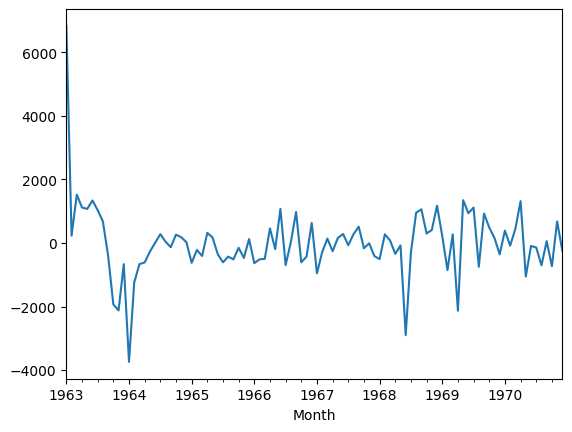

In [123]:
residual.plot()

In [124]:
df

,Month,MilesMM
Month,,
1963-01-01,1963-01-01,6827
1963-02-01,1963-02-01,6178
1963-03-01,1963-03-01,7084
1963-04-01,1963-04-01,8162
1963-05-01,1963-05-01,8462
...,...,...
1970-08-01,1970-08-01,14057
1970-09-01,1970-09-01,16234
1970-10-01,1970-10-01,12389


In [125]:
output=model_fit.forecast(5)

In [126]:
output

1971-01-01    11387.347454
1971-02-01    11106.138947
1971-03-01    13583.134407
1971-04-01    12762.143744
1971-05-01    13905.825687
Freq: MS, Name: predicted_mean, dtype: float64

In [127]:
yhat=model_fit.predict()
yhat

1963-01-01        0.000000
1963-02-01     5950.062457
1963-03-01     5565.127873
1963-04-01     7047.367283
1963-05-01     7391.118465
                  ...     
1970-08-01    14760.432330
1970-09-01    16176.898262
1970-10-01    13119.600814
1970-11-01    10918.879922
1970-12-01    13021.905030
Freq: MS, Name: predicted_mean, Length: 96, dtype: float64

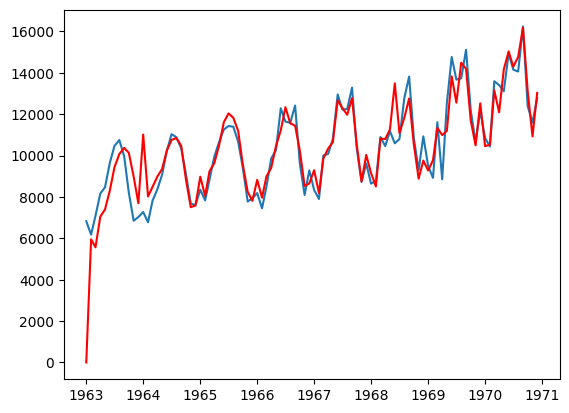

In [128]:
plt.plot(df['MilesMM'])
plt.plot(yhat,color='red')

In [129]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df['MilesMM'],yhat)

In [130]:
mse

1219491.0962437126